In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
delivery_time=pd.read_csv("delivery_time.csv")
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
delivery_time.shape


(21, 2)

In [5]:
delivery_time.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
delivery_time.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
delivery_time.nunique()

Delivery Time    21
Sorting Time      9
dtype: int64

In [8]:
delivery_time['Sorting Time'].unique()

array([10,  4,  6,  9,  7,  3,  8,  2,  5], dtype=int64)

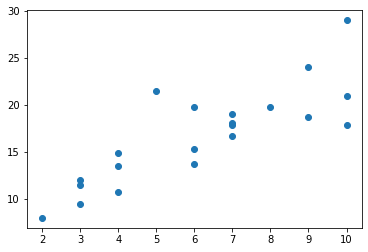

In [9]:
plt.scatter(x='Sorting Time',y='Delivery Time',data=delivery_time)

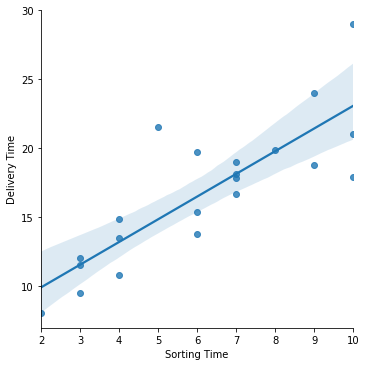

In [10]:
sns.lmplot(x='Sorting Time',y='Delivery Time',data=delivery_time)

<AxesSubplot:ylabel='Density'>

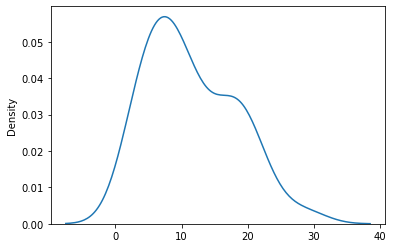

In [11]:
sns.distplot(a=delivery_time,hist=False)

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

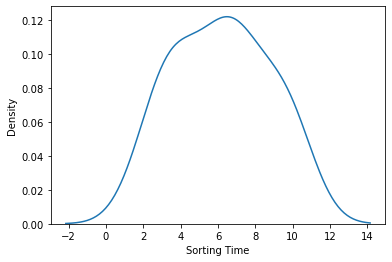

In [12]:
sns.distplot(a=delivery_time["Sorting Time"],hist=False)

In [13]:
import statsmodels.formula.api as smf

In [14]:
delivery_time.columns=['Del_time','Sor_time']

In [15]:
delivery_time.head()

,Del_time,Sor_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [16]:
model_1=smf.ols(formula='Del_time~Sor_time',data=delivery_time).fit()

In [17]:
model_1.params

Intercept    6.582734
Sor_time     1.649020
dtype: float64

In [18]:
print('AIC Score :',model_1.aic)
print('BIC SCORE :',model_1.bic)
print('R2 SCORE  :',model_1.rsquared)
print('ADjusted R2 SCORE',model_1.rsquared_adj)

AIC Score : 106.71400170798609
BIC SCORE : 108.80304658343293
R2 SCORE  : 0.6822714748417231
ADjusted R2 SCORE 0.6655489208860244


In [19]:
delivery_time['Log_model']=np.log(delivery_time['Sor_time'])
delivery_time['Square_root']=np.sqrt(delivery_time['Sor_time'])


In [20]:
delivery_time

,Del_time,Sor_time,Log_model,Square_root
0,21.00,10,2.302585,3.162278
1,13.50,4,1.386294,2.000000
2,19.75,6,1.791759,2.449490
3,24.00,9,2.197225,3.000000
4,29.00,10,2.302585,3.162278
5,15.35,6,1.791759,2.449490
6,19.00,7,1.945910,2.645751
7,9.50,3,1.098612,1.732051
8,17.90,10,2.302585,3.162278
9,18.75,9,2.197225,3.000000


In [21]:
model_2=smf.ols(formula='Del_time~Log_model',data=delivery_time).fit()

In [22]:
print('AIC Score :',model_2.aic)
print('BIC SCORE :',model_2.bic)
print('R2 SCORE  :',model_2.rsquared)
print('ADjusted R2 SCORE',model_2.rsquared_adj)
print(model_2.params)

AIC Score : 105.82484961062757
BIC SCORE : 107.91389448607441
R2 SCORE  : 0.6954434611324223
ADjusted R2 SCORE 0.6794141696130761
Intercept    1.159684
Log_model    9.043413
dtype: float64


In [23]:
model_3=smf.ols(formula='Del_time~Square_root',data=delivery_time).fit()

In [24]:
print('AIC Score :',model_3.aic)
print('BIC SCORE :',model_3.bic)
print('R2 SCORE  :',model_3.rsquared)
print('ADjusted R2 SCORE',model_3.rsquared_adj)
print(model_3.params)

AIC Score : 105.79982096676981
BIC SCORE : 107.88886584221666
R2 SCORE  : 0.6958062276308671
ADjusted R2 SCORE 0.6797960290851233
Intercept     -2.518837
Square_root    7.936591
dtype: float64


In [25]:
import pickle as pkl

In [26]:
pkl.dump(model_3,open('adarsh.pkl',"wb"))